# NBS Titanic Challenge

## Purpose
This notebooks has the purpose to work with four unlabeled datasets, and the goal here is to find the number of clusters and identify the right location for each centroid of corresponded cluster.

## Methodology

For each dataset make some data exploration (for understand the disbution for each feature), apply clustering algorithm (e.g. k-means, hierarchical, and DBSCAN).

## Results

...

## Suggested next steps

...

## Setup & Import Library

In [114]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from matplotlib import cm
from sklearn.metrics import silhouette_samples

import matplotlib.pyplot as plt
%matplotlib inline

# First Experiment: Dataset 01

## Load Data

In [116]:
df = pd.read_csv("../data/unlalbeled/dataset1.txt", delimiter=',', names=[f"feat_{i+1}" for i in range(8)])
df = df.reset_index(drop=True)
df.head()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8
0,461,501,472,486,517,509,480,515
1,487,511,501,499,490,495,485,512
2,505,506,494,529,495,536,528,522
3,490,507,497,504,487,507,539,461
4,504,491,478,517,472,467,508,514


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2048 entries, 0 to 2047
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   feat_1  2048 non-null   int64
 1   feat_2  2048 non-null   int64
 2   feat_3  2048 non-null   int64
 3   feat_4  2048 non-null   int64
 4   feat_5  2048 non-null   int64
 5   feat_6  2048 non-null   int64
 6   feat_7  2048 non-null   int64
 7   feat_8  2048 non-null   int64
dtypes: int64(8)
memory usage: 128.1 KB


## Data Preprocessing

In [118]:
X = df.to_numpy()

## Apply t-SNE to see the distribution of the original features in a subspace of 2D

In [122]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2,
            init='pca',
            random_state=42)
X_tsne = tsne.fit_transform(X)

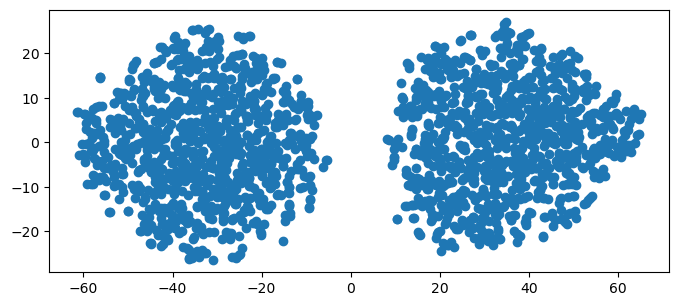

In [123]:
import matplotlib.patheffects as PathEffects


def plot_projection(x):

    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    plt.scatter(x[:, 0],
                x[:, 1])

plot_projection(X_tsne)
# plt.savefig('figures/05_13.png', dpi=300)
plt.show()

Appear to be two groups

## Clustering Algorithms

In [125]:
km = KMeans(n_clusters=2, 
            init='random', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)

y_km = km.fit_predict(X)

In [126]:
y_km

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [127]:
def plot_2d_clusters(y_pred, n_cluster=8):
    colors = ["lightgreen", "orange", "lightblue", "red", "gray", "purple", "blue", "green"]
    for i,c in enumerate(range(n_cluster)):
        color = colors[i%len(colors)]
        plt.scatter(X[y_pred == c, 0], X[y_pred == c, 1],
                    s=50, c=color, marker='o', edgecolor="black",
                    label=f"Cluester {c+1}"
        )
    plt.scatter(km.cluster_centers_[:, 0],
        km.cluster_centers_[:, 1],
        s=250, marker='*',
        c="red", edgecolor="black",
        label="Centroids"
    )
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend(scatterpoints=1)
    plt.grid()
    plt.tight_layout()
    plt.show()


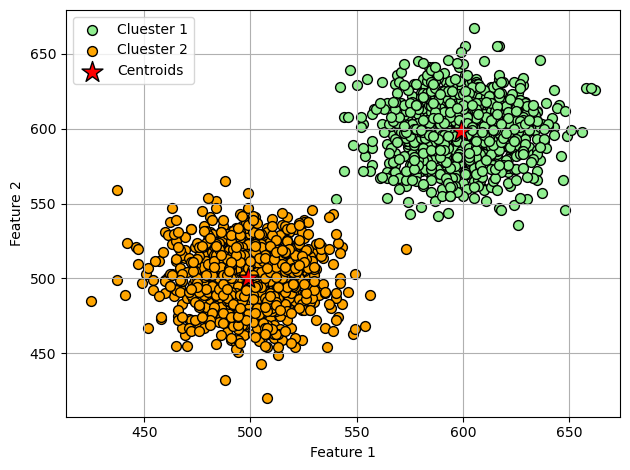

In [129]:
plot_2d_clusters(y_km, n_cluster=2)

The number of cluster appears to be right.

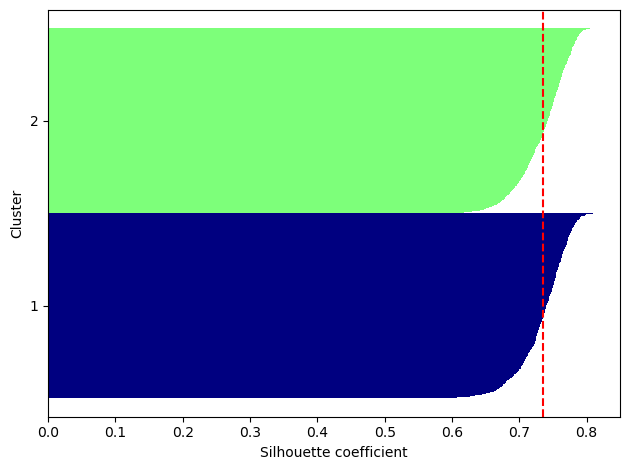

In [130]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
#plt.savefig('figures/10_06.png', dpi=300)
plt.show()

Quantify the quality of clustering via silhoutte plots appears to be a good representation.

# Second Experiment: Dataset 02

## Load Data

In [131]:
df = pd.read_csv("../data/unlalbeled/dataset2.txt", delimiter=',', names=[f"feat_{i+1}" for i in range(64)])
df = df.reset_index(drop=True)
df.head()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64
0,480,471,552,414,514,452,388,392,527,589,...,502,485,453,508,420,559,545,502,605,484
1,521,512,511,471,413,522,537,476,416,488,...,564,533,504,564,515,495,558,445,455,517
2,518,456,449,478,425,576,500,518,445,497,...,493,558,530,507,512,455,440,510,553,524
3,476,507,417,514,522,511,465,521,558,516,...,380,643,453,464,466,517,537,447,455,534
4,417,540,567,560,447,459,557,420,538,586,...,514,504,509,439,464,490,487,471,552,520


In [132]:
len([480,471,552,414,514,452,388,392,527,589,540,414,496,493,450,577,598,502,485,528,429,491,502,457,513,420,466,543,434,470,565,437,409,508,586,493,458,434,512,436,448,549,472,540,546,468,416,513,518,434,505,525,549,570,502,485,453,508,420,559,545,502,605,484])

64

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2048 entries, 0 to 2047
Data columns (total 64 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   feat_1   2048 non-null   int64
 1   feat_2   2048 non-null   int64
 2   feat_3   2048 non-null   int64
 3   feat_4   2048 non-null   int64
 4   feat_5   2048 non-null   int64
 5   feat_6   2048 non-null   int64
 6   feat_7   2048 non-null   int64
 7   feat_8   2048 non-null   int64
 8   feat_9   2048 non-null   int64
 9   feat_10  2048 non-null   int64
 10  feat_11  2048 non-null   int64
 11  feat_12  2048 non-null   int64
 12  feat_13  2048 non-null   int64
 13  feat_14  2048 non-null   int64
 14  feat_15  2048 non-null   int64
 15  feat_16  2048 non-null   int64
 16  feat_17  2048 non-null   int64
 17  feat_18  2048 non-null   int64
 18  feat_19  2048 non-null   int64
 19  feat_20  2048 non-null   int64
 20  feat_21  2048 non-null   int64
 21  feat_22  2048 non-null   int64
 22  feat_23  2048 non-null  

## Data Preprocessing

In [134]:
X = df.to_numpy()

## Apply t-SNE to see the distribution of the original features in a subspace of 2D

In [135]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2,
            init='pca',
            random_state=42)
X_tsne = tsne.fit_transform(X)

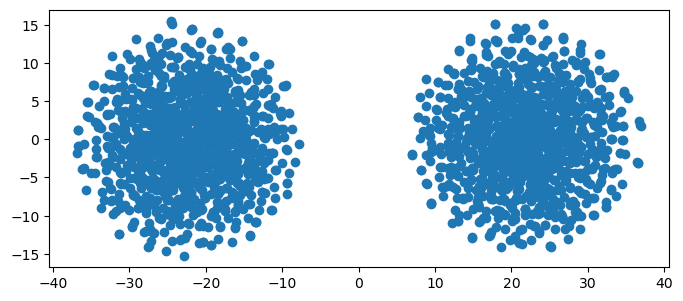

In [136]:
import matplotlib.patheffects as PathEffects


def plot_projection(x):

    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    plt.scatter(x[:, 0],
                x[:, 1])

plot_projection(X_tsne)
# plt.savefig('figures/05_13.png', dpi=300)
plt.show()

Appear to be two groups

In [137]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)

X_pca = pca.fit_transform(X)

## Clustering Algorithms

In [138]:
km = KMeans(n_clusters=2, 
            init='random', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)

y_km = km.fit_predict(X_pca)
y_km

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [139]:
def plot_2d_clusters(X, y_pred, n_cluster=8):
    colors = ["lightgreen", "orange", "lightblue", "red", "gray", "purple", "blue", "green"]
    for i,c in enumerate(range(n_cluster)):
        color = colors[i%len(colors)]
        plt.scatter(X[y_pred == c, 0], X[y_pred == c, 1],
                    s=50, c=color, marker='o', edgecolor="black",
                    label=f"Cluester {c+1}"
        )
    plt.scatter(km.cluster_centers_[:, 0],
        km.cluster_centers_[:, 1],
        s=250, marker='*',
        c="red", edgecolor="black",
        label="Centroids"
    )
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend(scatterpoints=1)
    plt.grid()
    plt.tight_layout()
    plt.show()


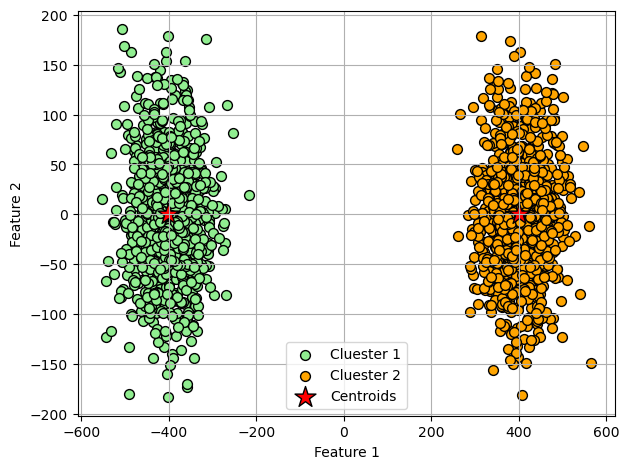

In [140]:
plot_2d_clusters(X_pca, y_km, n_cluster=2)

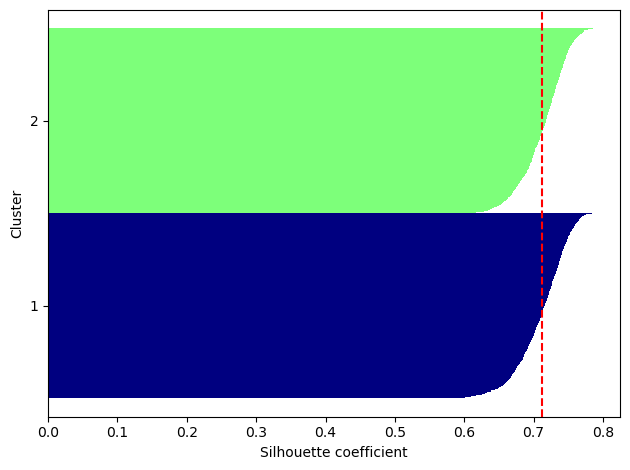

In [141]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X_pca, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
#plt.savefig('figures/10_06.png', dpi=300)
plt.show()

Quantify the quality of clustering via silhoutte plots appears to be a good representation.

# Third Experiment: Dataset 03

## Load Data

In [160]:
df = pd.read_csv("../data/unlalbeled/dataset3.txt", delimiter=',', names=[f"feat_{i+1}" for i in range(17)])
df = df.reset_index(drop=True)
df.head()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17
0,NaN,29020,860619,658827,854383,199909.0,71042,181528,450820,43739,345940,789286,362103,620337,310595,461270,NaN
1,NaN,32683,862625,671429,818015,192524.0,52264,146394,447133,36171,378042,784684,356856,594499,319498,478757,NaN
2,NaN,34519,859181,678552,824984,194710.0,50986,164282,448693,14559,369041,776997,367400,615245,281741,445673,NaN
3,NaN,35250,847859,652480,828636,196389.0,63096,166515,429911,54324,368559,765723,361038,623793,299209,443797,NaN
4,NaN,35920,860543,651526,796781,222808.0,64757,171196,446089,40085,366475,782777,386218,605180,312034,478862,NaN


In [161]:
df = df.drop(["feat_1", "feat_17"], axis=1)
df.head()

,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16
0,29020,860619,658827,854383,199909.0,71042,181528,450820,43739,345940,789286,362103,620337,310595,461270
1,32683,862625,671429,818015,192524.0,52264,146394,447133,36171,378042,784684,356856,594499,319498,478757
2,34519,859181,678552,824984,194710.0,50986,164282,448693,14559,369041,776997,367400,615245,281741,445673
3,35250,847859,652480,828636,196389.0,63096,166515,429911,54324,368559,765723,361038,623793,299209,443797
4,35920,860543,651526,796781,222808.0,64757,171196,446089,40085,366475,782777,386218,605180,312034,478862


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10125 entries, 0 to 10124
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   feat_2   10125 non-null  int64  
 1   feat_3   10125 non-null  int64  
 2   feat_4   10125 non-null  int64  
 3   feat_5   10125 non-null  int64  
 4   feat_6   10124 non-null  float64
 5   feat_7   10125 non-null  int64  
 6   feat_8   10125 non-null  int64  
 7   feat_9   10125 non-null  int64  
 8   feat_10  10125 non-null  int64  
 9   feat_11  10125 non-null  int64  
 10  feat_12  10125 non-null  int64  
 11  feat_13  10125 non-null  int64  
 12  feat_14  10125 non-null  int64  
 13  feat_15  10125 non-null  int64  
 14  feat_16  10125 non-null  int64  
dtypes: float64(1), int64(14)
memory usage: 1.2 MB


In [165]:
df = df.dropna()
df.shape

(10124, 15)

## Data Preprocessing

In [166]:
X = df.to_numpy()

## Apply t-SNE to see the distribution of the original features in a subspace of 2D

In [167]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2,
            init='pca',
            random_state=42)
X_tsne = tsne.fit_transform(X)

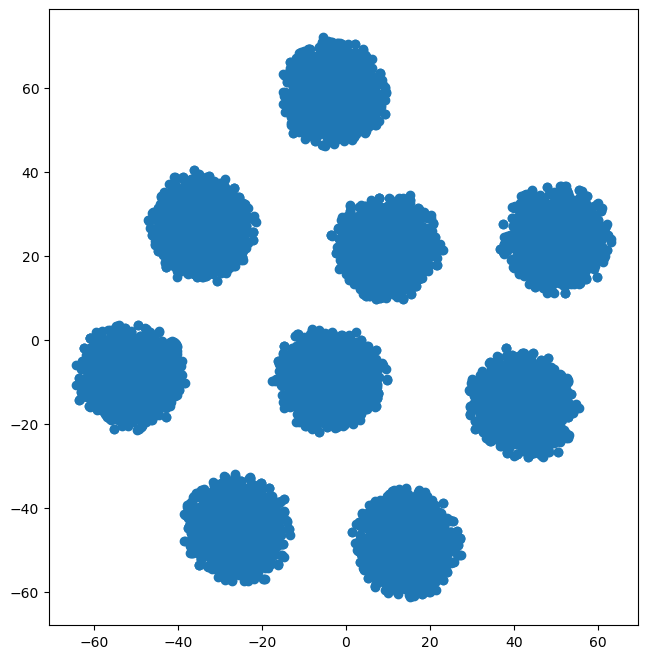

In [168]:
import matplotlib.patheffects as PathEffects


def plot_projection(x):
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    plt.scatter(x[:, 0],
                x[:, 1])

plot_projection(X_tsne)
# plt.savefig('figures/05_13.png', dpi=300)
plt.show()

According to t-SNE we 9 cluster, so we have to set the number of componets for Kmeans 9, and the disbution appears to be normal

In [201]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

pca = PCA(n_components=10)

X_pca = pca.fit_transform(sc.fit_transform(X))

## Clustering Algorithms

In [202]:
km = KMeans(n_clusters=9, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)

y_km = km.fit_predict(X_pca)
y_km

array([8, 8, 8, ..., 1, 1, 1], dtype=int32)

In [203]:
def plot_2d_clusters(X, y_pred, n_cluster=8):
    colors = ["lightgreen", "orange", "lightblue", "red", "gray", "purple", "blue", "green"]
    for i,c in enumerate(range(n_cluster)):
        color = colors[i%len(colors)]
        plt.scatter(X[y_pred == c, 0], X[y_pred == c, 1],
                    s=50, c=color, marker='o', edgecolor="black",
                    label=f"Cluester {c+1}"
        )
    plt.scatter(km.cluster_centers_[:, 0],
        km.cluster_centers_[:, 1],
        s=250, marker='*',
        c="red", edgecolor="black",
        label="Centroids"
    )
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend(scatterpoints=1)
    plt.grid()
    plt.tight_layout()
    plt.show()


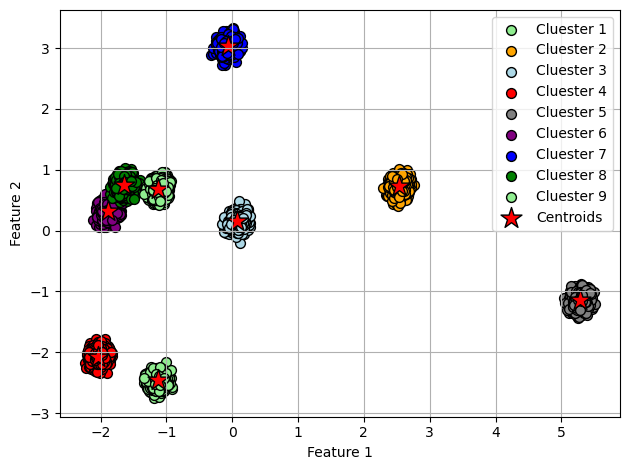

In [205]:
plot_2d_clusters(X_pca, y_km, n_cluster=9)

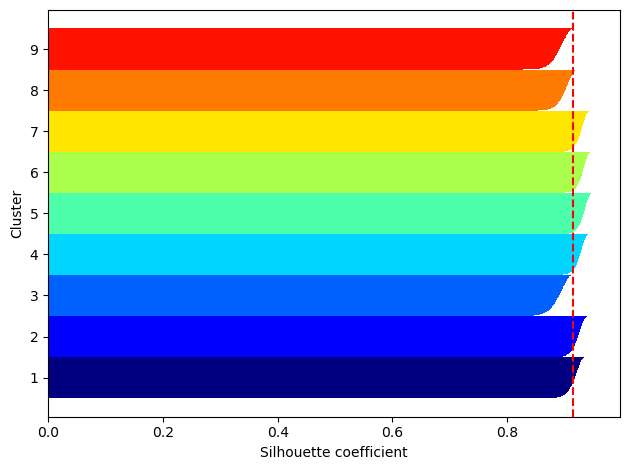

In [206]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X_pca, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
#plt.savefig('figures/10_06.png', dpi=300)
plt.show()

Quantify the quality of clustering via silhoutte plots appears to be a good representation in almost scenarios, maybe the cluster 3, 8 and 9 is not good compared to the others clustering.

# Fourth Experiment: Dataset 04

## Load Data

In [224]:
df = pd.read_csv("../data/unlalbeled/dataset4.txt", delimiter=',', names=[f"feat_{i+1}" for i in range(1025)])
df = df.reset_index(drop=True)
df.head()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_1016,feat_1017,feat_1018,feat_1019,feat_1020,feat_1021,feat_1022,feat_1023,feat_1024,feat_1025
0,NaN,126,151,205,39,163,36,136,187,113,...,86,112,165,173,204,91,59,149,139,128
1,NaN,126,151,205,39,162,36,136,187,113,...,86,112,165,174,204,91,59,148,139,127
2,NaN,126,151,205,39,163,36,137,188,113,...,86,111,165,173,204,91,59,148,139,127
3,NaN,126,151,204,39,162,37,136,187,113,...,87,112,165,172,203,91,59,148,140,127
4,NaN,127,151,206,39,162,36,135,188,112,...,86,112,165,173,204,91,59,148,139,128


In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024 entries, 0 to 1023
Columns: 1025 entries, feat_1 to feat_1025
dtypes: float64(1), int64(1024)
memory usage: 8.0 MB


In [226]:
df.shape

(1024, 1025)

In [234]:
df = df.drop(["feat_1"], axis=1)
df.shape

(1024, 1024)

## Data Preprocessing

In [235]:
X = df.to_numpy()

## Apply t-SNE to see the distribution of the original features in a subspace of 2D

In [236]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2,
            init='pca',
            random_state=42)
X_tsne = tsne.fit_transform(X)

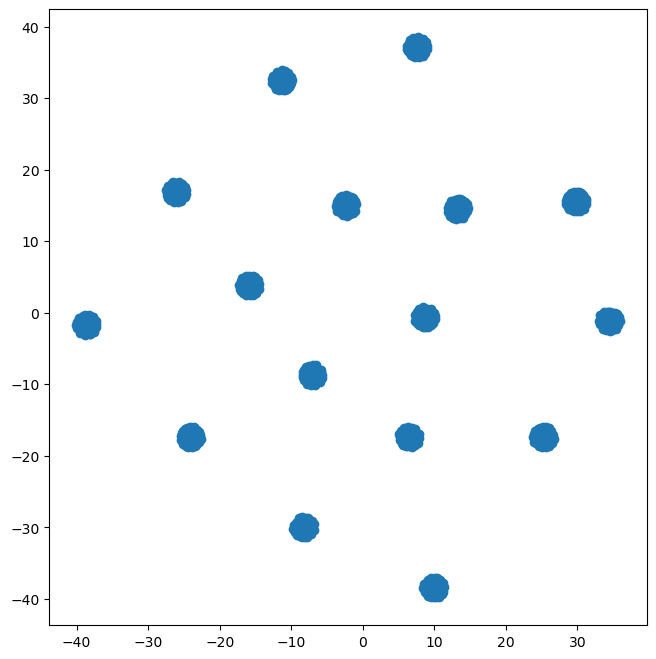

In [237]:
import matplotlib.patheffects as PathEffects


def plot_projection(x):
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    plt.scatter(x[:, 0],
                x[:, 1])

plot_projection(X_tsne)
# plt.savefig('figures/05_13.png', dpi=300)
plt.show()

According to t-SNE we 9 cluster, so we have to set the number of componets for Kmeans 16, and the disbution appears to be normal

In [238]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

pca = PCA(n_components=16)

X_pca = pca.fit_transform(sc.fit_transform(X))

## Clustering Algorithms

In [244]:
km = KMeans(n_clusters=16, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)

y_km = km.fit_predict(X_pca)
y_km

array([ 2,  2,  2, ..., 11, 11, 11], dtype=int32)

In [247]:
def plot_2d_clusters(X, y_pred, n_cluster=8):
    colors = ["lightgreen", "orange", "lightblue", "red", "gray", "purple", "blue", "green"]
    for i,c in enumerate(range(n_cluster)):
        color = colors[i%len(colors)]
        plt.scatter(X[y_pred == c, 0], X[y_pred == c, 1],
                    s=150, c=color, marker='o', edgecolor="black",
                    label=f"Cluester {c+1}"
        )
    plt.scatter(km.cluster_centers_[:, 0],
        km.cluster_centers_[:, 1],
        s=250, marker='*',
        c="red", edgecolor="black",
        label="Centroids"
    )
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend(scatterpoints=1, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid()
    plt.tight_layout()
    plt.show()


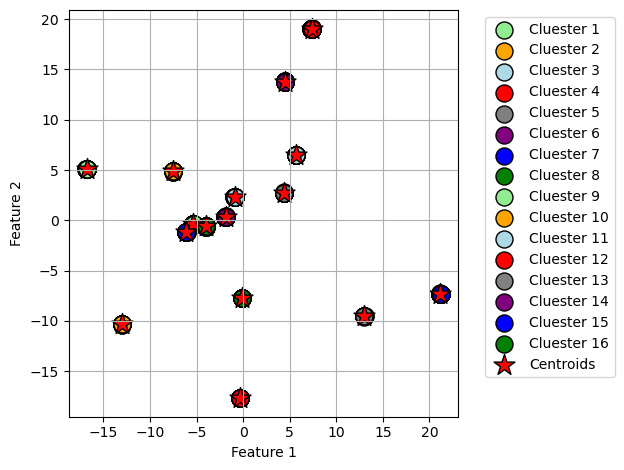

In [248]:
plot_2d_clusters(X_pca, y_km, n_cluster=16)

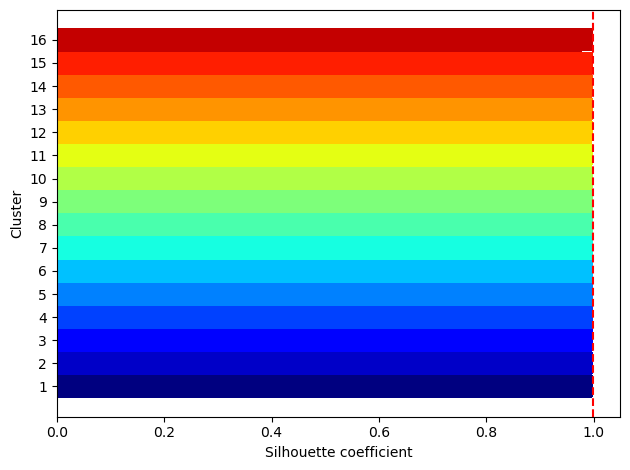

In [249]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X_pca, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
#plt.savefig('figures/10_06.png', dpi=300)
plt.show()

Quantify the quality of clustering via silhoutte plots appears to be a good representation.